In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('model_data.csv')

In [3]:
data.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


> Some entries for year renovated is zero, which could mean that the houses have not been renovated since it was built. We would replace them with the year built.

In [4]:
def yr_col (col1, col2):
    if col1 == 0:
        col1 = col2
    else:
        col1
    return col1

In [5]:
data['yr_renovated'] = data.apply(lambda x: yr_col(x['yr_renovated'], x['yr_built']), axis =1)

In [6]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,1921,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,1966,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,1963,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4549 entries, 0 to 4548
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4549 non-null   object 
 1   price          4549 non-null   float64
 2   bedrooms       4549 non-null   float64
 3   bathrooms      4549 non-null   float64
 4   sqft_living    4549 non-null   int64  
 5   sqft_lot       4549 non-null   int64  
 6   floors         4549 non-null   float64
 7   waterfront     4549 non-null   int64  
 8   view           4549 non-null   int64  
 9   condition      4549 non-null   int64  
 10  sqft_above     4549 non-null   int64  
 11  sqft_basement  4549 non-null   int64  
 12  yr_built       4549 non-null   int64  
 13  yr_renovated   4549 non-null   int64  
 14  street         4549 non-null   object 
 15  city           4549 non-null   object 
 16  statezip       4549 non-null   object 
 17  country        4549 non-null   object 
dtypes: float

> We will drop the date, street, statezip and country columns as they don't have significant effect on the price of a house

In [8]:
data.drop(columns=['date','country', 'statezip', 'street'], inplace=True)

In [9]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,1921,Seattle
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,1966,Kent
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,1963,Bellevue
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4544,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle
4545,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue
4546,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,2009,Renton
4547,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,1974,Seattle


## Data preprocessing

In [10]:
# Converting the city variable to numerical values.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['city'] = le.fit_transform(data['city'])

In [11]:
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,1921,35
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,1966,18
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,1963,3
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31


#### Handling Outliers

As indentified during the EDA process, the variables have outlier. I used the percentile approach to detect the outliers. Removing the outliers increased the accuracy score of the model.

In [12]:
data.describe(percentiles=[.01, .02, .03, .05, .1, .5, .9, .92, .95, .99]).T

,count,mean,std,min,1%,2%,3%,5%,10%,50%,90%,92%,95%,99%,max
price,4549.0,557625.653765,563891.453612,7800.00,148000.00,170000.00,187720.00,210000.0,245000.0,465000.00,902000.0,975000.00,1185000.6,2016440.00,26590000.0
bedrooms,4549.0,3.396131,0.901988,1.00,2.00,2.00,2.00,2.0,2.0,3.00,4.0,5.00,5.0,6.00,9.0
bathrooms,4549.0,2.155968,0.775205,0.75,1.00,1.00,1.00,1.0,1.0,2.25,3.0,3.25,3.5,4.50,8.0
sqft_living,4549.0,2131.578809,955.234941,370.00,720.00,800.00,860.00,950.0,1110.0,1970.00,3320.0,3500.00,3846.0,5065.20,13540.0
sqft_lot,4549.0,14834.598813,35971.144296,638.00,1024.40,1199.88,1310.32,1676.4,3249.0,7680.00,24303.6,32483.40,43560.0,205010.48,1074218.0
floors,4549.0,1.511651,0.537794,1.00,1.00,1.00,1.00,1.0,1.0,1.50,2.0,2.00,2.0,3.00,3.5
waterfront,4549.0,0.006595,0.080949,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,1.0
view,4549.0,0.234337,0.765085,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,2.00,2.0,4.00,4.0
condition,4549.0,3.449549,0.675242,1.00,3.00,3.00,3.00,3.0,3.0,3.00,4.0,5.00,5.0,5.00,5.0
sqft_above,4549.0,1821.291932,853.292493,370.00,704.80,760.00,800.00,860.0,970.0,1590.00,3010.0,3150.00,3426.0,4450.40,9410.0


In [13]:
data_1 = data[(
                (data['price'] <= 2000000) & 
                (data['price'] > 150000) & 
                (data['bathrooms'] <= 4.5) & 
                (data['condition'] > 2) & 
                (data['sqft_living'] > 700) & 
                (data['sqft_living'] <= 5000) & 
                (data['sqft_lot'] <= 50000) & 
                (data['sqft_above'] <= 5000) &
                (data['sqft_basement'] <= 5000) &
                (data['bedrooms'] <= 6) 
                )]

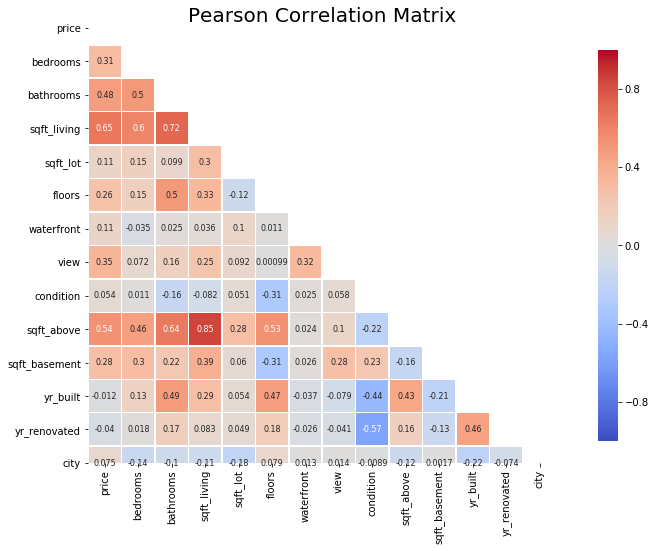

In [14]:
# Correlation between features
mask = np.zeros(data_1.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

plt.figure(figsize=(15, 8))
plt.title('Pearson Correlation Matrix', fontsize=20)

sns.heatmap(data_1.corr(), linewidths=0.5, vmin = -1, vmax=1, square=True, cmap="coolwarm",
            annot=True, annot_kws={"size":8}, mask=mask, cbar_kws={"shrink": .9});

> As seen in the correlation chart above, there is a strong correlation between sqft_living, sqft_above, number of bathrooms, bedrooms, floors. So, the sqft_living and sqft_above features will be dropped to above multicollinearity.

In [15]:
data_1 = data_1.drop(columns=['sqft_living', 'sqft_above'])

In [16]:
# We normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(data_1), columns=data_1.columns)
features_df = normalised_df.drop(columns=['price'])
target_df = normalised_df['price']

In [17]:
normalised_df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,city
0,0.087121,0.4,0.200000,0.147576,0.2,0.0,0.0,0.0,0.000000,0.482456,0.921053,0.837209
1,0.102814,0.4,0.333333,0.229438,0.0,0.0,0.0,0.5,0.000000,0.578947,0.578947,0.418605
2,0.145022,0.4,0.400000,0.149970,0.0,0.0,0.0,0.5,0.429185,0.552632,0.552632,0.069767
3,0.215368,0.6,0.466667,0.200081,0.0,0.0,0.0,0.5,0.343348,0.666667,0.807018,0.720930
4,0.182900,0.2,0.066667,0.116494,0.0,0.0,0.0,0.0,0.000000,0.333333,0.824561,0.813953


## Modelling

In [18]:
# 80% of the data is used for the training of the models and the rest is used for testing
x_train, x_test, y_train, y_test = train_test_split(features_df,target_df,test_size=0.2,random_state=42)

In [21]:
models = [LinearRegression(),
          RandomForestRegressor(n_estimators=100, max_features='sqrt'),
          KNeighborsRegressor(n_neighbors=6),
          SVR(kernel='linear'),
          Lasso(alpha=0.001),
          Ridge(alpha=0.4)
          ]

TestModels = pd.DataFrame()
tmp = {}

for model in models:
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    model.fit(x_train, y_train)
    
    tmp['R2_Score'] = r2_score(y_test, model.predict(x_test))
    tmp['RMSE_train'] = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
    tmp['RMSE_test'] = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
    
    TestModels = TestModels.append(tmp, ignore_index=True)

### Hyperparameter Tunning

In [22]:
import xgboost as xgb
#import lightgbm as lgb
xgb_clf = xgb.XGBRegressor(objective='reg:squarederror') 
parameters = {'n_estimators': [60, 100, 120, 140, 160, 200], 
              'learning_rate': [0.01, 0.1],
              'max_depth': [5, 7],
              'reg_lambda': [0.5]}
xgb_reg = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=5, n_jobs=-1).fit(x_train, y_train)
y_pred = xgb_reg.predict(x_test)

print("Best parameters set:", xgb_reg.best_params_)
#print("R-squared score: %0.3f" % r2_score(y_test, y_pred))
#print("RMSE_test: %0.3f" % np.sqrt(mean_squared_error(y_test, y_pred)))
#print("RMSE_train: %0.3f" % np.sqrt(mean_squared_error(y_train, xgb_reg.predict(x_train))))
tmp['Model'] = 'XGBoost'
tmp['R2_Score'] = r2_score(y_test, y_pred)
tmp['RMSE_train'] = np.sqrt(mean_squared_error(y_train, xgb_reg.predict(x_train)))
tmp['RMSE_test'] = np.sqrt(mean_squared_error(y_test, xgb_reg.predict(x_test)))
TestModels = TestModels.append(tmp, ignore_index=True)

Best parameters set: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'reg_lambda': 0.5}


In [23]:
rfc = RandomForestRegressor(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 'n_estimators': [200, 700], 'max_features': ['auto', 'sqrt', 'log2']}

CV_reg = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_reg.fit(x_train, y_train)
y_pred = CV_reg.predict(x_test)

print("Best parameters set:", CV_reg.best_params_)
#print("R-squared score: %0.3f" % r2_score(y_test, y_pred))
#print("RMSE_test: %0.3f" % np.sqrt(mean_squared_error(y_test, y_pred)))
#print("RMSE_train: %0.3f" % np.sqrt(mean_squared_error(y_train, CV_reg.predict(x_train))))

tmp['Model'] = 'RandonForest_tuned'
tmp['R2_Score'] = r2_score(y_test, y_pred)
tmp['RMSE_train'] = np.sqrt(mean_squared_error(y_train, CV_reg.predict(x_train)))
tmp['RMSE_test'] = np.sqrt(mean_squared_error(y_test, CV_reg.predict(x_test)))
TestModels = TestModels.append(tmp, ignore_index=True)

Best parameters set: {'max_features': 'auto', 'n_estimators': 700}


In [24]:
# catboost for regression
from numpy import mean
from numpy import std
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# evaluate the model
model = CatBoostRegressor(verbose=0, n_estimators=100)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# fit the model on the whole dataset
model = CatBoostRegressor(verbose=0, n_estimators=100)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
#yhat = r2_score(y_test, y_pred)
#print('r2_score: %.2f' % yhat)
#print("RMSE_test: %0.3f" % np.sqrt(mean_squared_error(y_test, y_pred)))
#print("RMSE_train: %0.3f" % np.sqrt(mean_squared_error(y_train, model.predict(x_train))))

tmp['Model'] = 'CatBoost'
tmp['R2_Score'] = r2_score(y_test, y_pred)
tmp['RMSE_train'] = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))
tmp['RMSE_test'] = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
TestModels = TestModels.append(tmp, ignore_index=True)

In [25]:
TestModels

,Model,R2_Score,RMSE_test,RMSE_train
0,LinearRegression,0.401974,0.117541,0.116676
1,RandomForestRegressor,0.541615,0.102907,0.038326
2,KNeighborsRegressor,0.418524,0.115903,0.098262
3,SVR,0.393605,0.118361,0.117477
4,Lasso,0.391857,0.118531,0.117522
5,Ridge,0.401791,0.117559,0.116677
6,XGBoost,0.626074,0.092944,0.052393
7,RandonForest_tuned,0.582302,0.098234,0.036795
8,CatBoost,0.638331,0.091408,0.065547


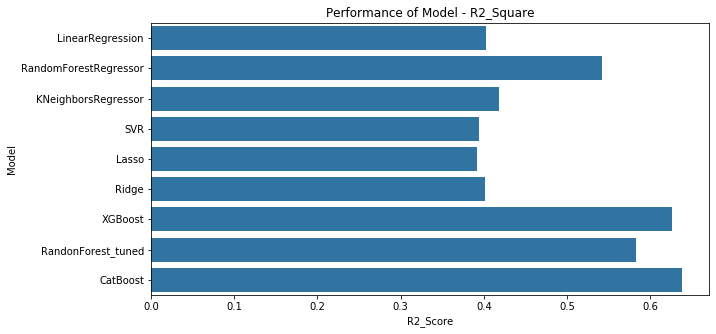

In [26]:
plt.figure(figsize=([10,5]))
default_color = sns.color_palette()[0]
sns.barplot(y = 'Model', x = 'R2_Score', data = TestModels, color = default_color)
plt.title('Performance of Model - R2_Square');

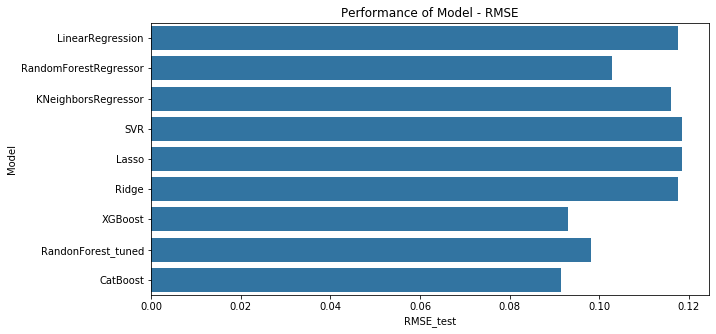

In [27]:
plt.figure(figsize=([10,5]))
default_color = sns.color_palette()[0]
sns.barplot(y = 'Model', x = 'RMSE_test', data = TestModels, color = default_color)
plt.title('Performance of Model - RMSE');

>> Out of the nine(9) algorithms considered, CatBoost is the best algorithm for the model, with an R2_squared score of **0.64** and RMSE of **0.091**.

> The somewhat low r2 score can be attributed to the dataset. More dataset is recommended for an improved score and better performance of the model.